# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

Importing Datasets

In [ ]:
well_13 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 13',index_col=0)
well_14 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 14')
well_15 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 15')

# Concatenations

In [ ]:
data = pd.concat([well_14,well_15],axis=0)
data["Well"]=data["Well"].astype("category")


In [ ]:
data['RT_log'] = np.log10(data.RT)

In [ ]:
data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361
...,...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB,0.245266
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB,0.217747
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB,0.203305
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB,0.170848


# Pairplot

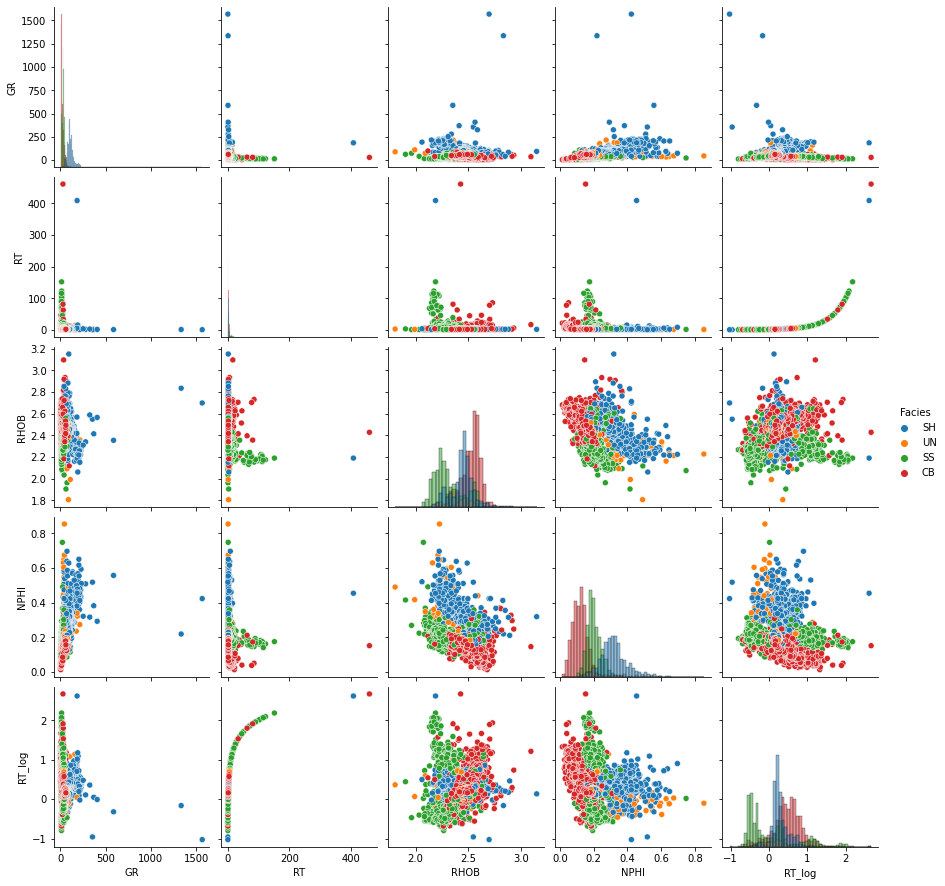

In [ ]:
sns.pairplot(data.drop(columns=["Well","Depth"]),hue="Facies",diag_kind="hist")

#Mapping facies values

In [ ]:
dictt = {"SH":1,"UN":2,"SS":3,"CB":4}
data["Facies_Label"]=data["Facies"].map(dictt)


In [ ]:
data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_Label
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2
...,...,...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB,0.245266,4
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB,0.217747,4
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB,0.203305,4
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB,0.170848,4


# Displaying well logs along facies

In [ ]:
facies_colors = ['#2E86C1', '#196F3D','#F4D03F','#DC7633']
facies = list(data["Facies"].unique())
data = data.sort_values(by="Depth")

In [ ]:
def make_facies_log_plot(data, facies_colors):
  cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)],"indexed")
  ztop=data["Depth"].min()
  zbottom=data["Depth"].max()
  cluster=np.repeat(data['Facies_Label'].values.reshape(-1,1), 100, 1)
  fig,ax=plt.subplots(nrows=1,ncols=len(facies_colors)+1,figsize=(12,20))
  ax[0].plot(data["GR"],data["Depth"],'-g')
  ax[1].plot(data["RT_log"],data["Depth"],'-')
  ax[2].plot(data["NPHI"],data["Depth"],'-',color='0.5')
  ax[3].plot(data["RHOB"],data["Depth"],'-',color='r')
  im=ax[4].imshow(cluster,aspect='auto',cmap=cmap_facies,vmin=1,vmax=4)
  divider=make_axes_locatable(ax[4])
  cax = divider.append_axes("right", size="20%", pad=0.05)
  cbar=plt.colorbar(im,cax=cax)
  cbar.set_label((100*' ').join(['SH', 'UN', 'SS', 'CB']))
  cbar.set_ticks(range(0,1)); 
  cbar.set_ticklabels('')
  for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbottom)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=3)
  ax[0].set_xlabel("GR")
  ax[0].set_xlim(data["GR"].min(),data["GR"].max())
  ax[1].set_xlabel("RT")
  ax[1].set_xlim(data["RT_log"].min(),data["RT_log"].max())
  ax[2].set_xlabel("NPHI")
  ax[2].set_xlim(data["NPHI"].min(),data["NPHI"].max())
  ax[3].set_xlabel("RHOB")
  ax[3].set_xlim(data["RHOB"].min(),data["RHOB"].max())
  ax[4].set_xlabel('Facies')
  ax[4].set_yticklabels([])
  
    


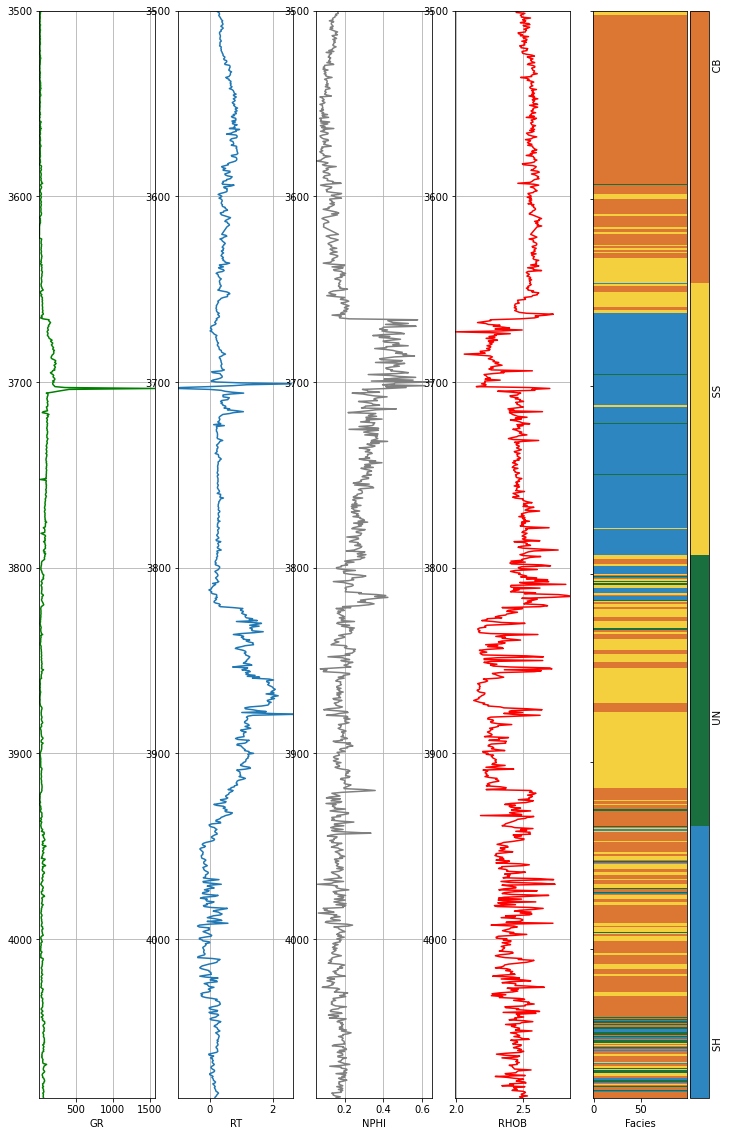

In [ ]:
make_facies_log_plot(data[data['Well']==15],facies_colors)

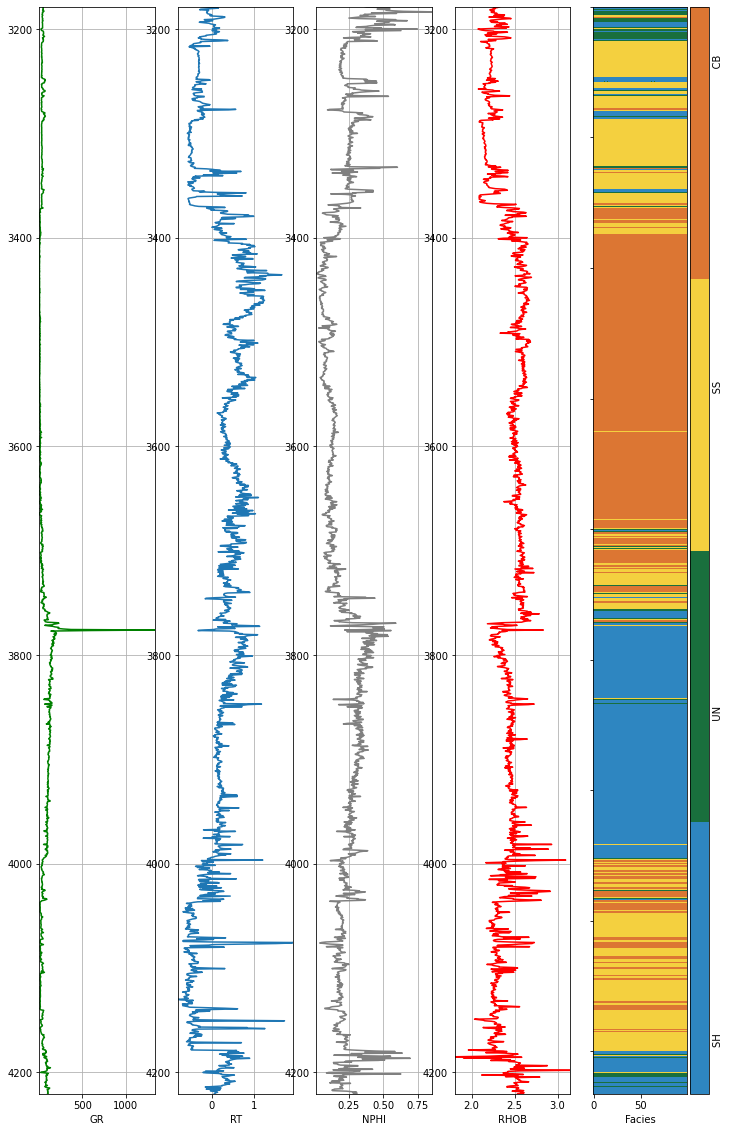

In [ ]:
make_facies_log_plot(data[data['Well']==14],facies_colors)

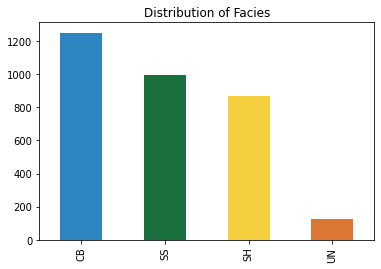

In [ ]:
Facies_dist=data['Facies'].value_counts()
Facies_dist.plot(kind='bar',color=facies_colors,title='Distribution of Facies')

#Selection of target variable and independent variable

In [ ]:
X = data.drop(columns=["Well","RT_log","Facies","Facies_Label"])
X =  X.set_index("Depth")
X

,GR,RT,RHOB,NPHI
Depth,,,,
3178.5,50.2190,0.5888,2.3296,0.3657
3179.0,47.2468,0.7768,2.3170,0.3776
3179.5,49.5247,1.0707,2.2960,0.5390
3180.0,44.9124,1.4460,2.2514,0.5482
3180.5,47.0048,0.9542,2.2733,0.5076
...,...,...,...,...
4218.5,104.2228,1.2340,2.5691,0.2684
4219.0,102.1531,1.3889,2.5750,0.3058
4219.5,105.3466,1.2691,2.6109,0.2785


In [ ]:
Y = data[["Facies_Label"]]
Y

,Facies_Label
0,1
1,2
2,1
3,2
4,2
...,...
2077,1
2078,1
2079,1
2080,1


#Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.8,random_state=1000)

#Scaling

### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

#### Training set

In [ ]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [ ]:
print(f"The Original Median {list(scaler.center_)}")
print(f"The Original IQR {list(scaler.scale_)}")

The Original Median [33.83755, 1.8545, 2.45815, 0.1877]
The Original IQR [55.706900000000005, 2.7177249999999997, 0.23832499999999968, 0.13419999999999999]


In [ ]:
print(f"Scaled median {np.median(X_train_scaled,axis=0)}")
print(f"Scaled IQR  {(np.percentile(X_train_scaled,75,axis=0)-np.percentile(X_train_scaled,25,axis=0))}")

Scaled median [0.00000000e+00 0.00000000e+00 9.31654927e-16 0.00000000e+00]
Scaled IQR  [1. 1. 1. 1.]


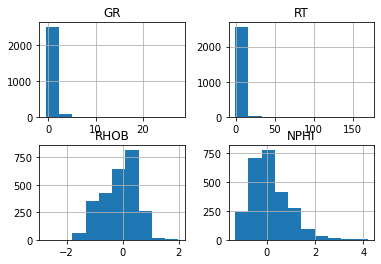

In [ ]:
X_train = pd.DataFrame(X_train_scaled,columns=(X_train.columns))
X_train.hist()
plt.show()

#### Testing set

In [ ]:
scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)

In [ ]:
print(f"The Original Median {list(scaler.center_)}")
print(f"The Original IQR {list(scaler.scale_)}")

The Original Median [34.801, 1.892, 2.461, 0.1892]
The Original IQR [48.93520000000001, 2.4972000000000003, 0.23940000000000028, 0.13249999999999998]


In [ ]:
print(f"Scaled median {np.median(X_test_scaled,axis=0)}")
print(f"Scaled IQR  {(np.percentile(X_test_scaled,75,axis=0)-np.percentile(X_test_scaled,25,axis=0))}")

Scaled median [0. 0. 0. 0.]
Scaled IQR  [1. 1. 1. 1.]


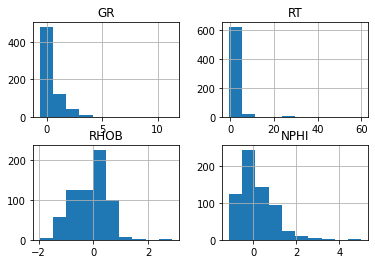

In [ ]:
X_test = pd.DataFrame(X_test_scaled,columns=(X_test.columns))
X_test.hist()
plt.show()

# Outlier Removal through Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest,RandomForestClassifier

In [ ]:
iforest= IsolationForest(n_estimators=100,contamination=0.5/100)
iforest.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.005,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
X_train["predict"]=pd.DataFrame(iforest.predict(X_train)).astype("category")
X_train

,GR,RT,RHOB,NPHI,predict
0,0.837642,-0.000184,0.230148,0.426975,1
1,0.061645,-0.577873,-0.815483,0.318182,1
2,0.277640,-0.213230,-0.004825,-0.035022,1
3,0.057936,-0.287557,-0.200357,-0.230999,1
4,-0.355460,0.019686,0.083709,-0.207899,1
...,...,...,...,...,...
2587,-0.030485,0.602379,0.405958,-0.491803,1
2588,1.128028,-0.170584,0.049722,0.589419,1
2589,-0.389872,32.453063,-1.183888,-0.157228,1
2590,-0.346933,0.524630,0.502885,-0.596870,1


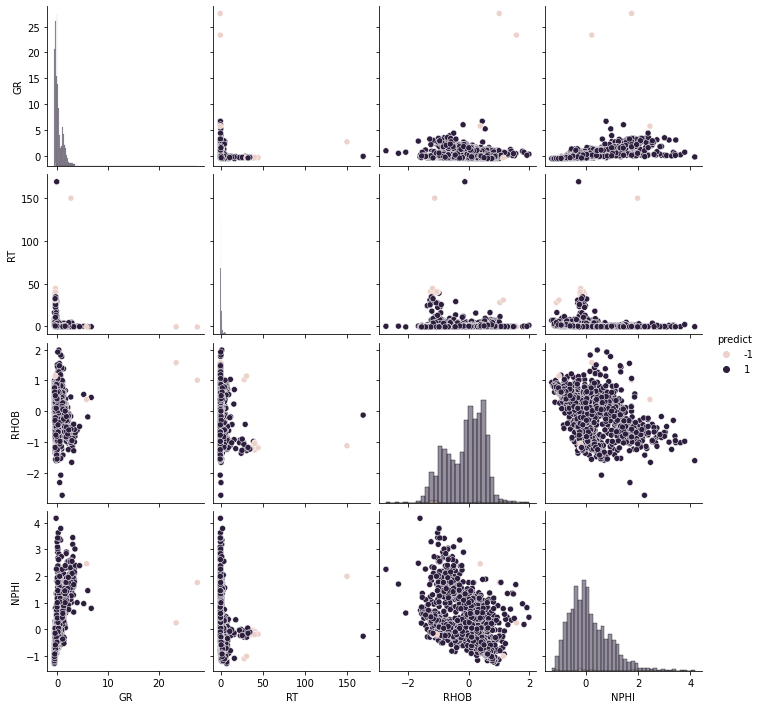

In [ ]:
sns.pairplot(X_train,hue='predict',diag_kind='hist')

In [ ]:
X_train["predict"].value_counts()

 1    2579
-1      13
Name: predict, dtype: int64

In [ ]:
X_train

,GR,RT,RHOB,NPHI,predict
0,0.837642,-0.000184,0.230148,0.426975,1
1,0.061645,-0.577873,-0.815483,0.318182,1
2,0.277640,-0.213230,-0.004825,-0.035022,1
3,0.057936,-0.287557,-0.200357,-0.230999,1
4,-0.355460,0.019686,0.083709,-0.207899,1
...,...,...,...,...,...
2587,-0.030485,0.602379,0.405958,-0.491803,1
2588,1.128028,-0.170584,0.049722,0.589419,1
2589,-0.389872,32.453063,-1.183888,-0.157228,1
2590,-0.346933,0.524630,0.502885,-0.596870,1


In [ ]:
X_train["Y_train"]=Y_train.reset_index(drop=True)
X_train=X_train[X_train["predict"]==1]
X_train

,GR,RT,RHOB,NPHI,predict,Y_train
0,0.837642,-0.000184,0.230148,0.426975,1,1
1,0.061645,-0.577873,-0.815483,0.318182,1,3
2,0.277640,-0.213230,-0.004825,-0.035022,1,4
3,0.057936,-0.287557,-0.200357,-0.230999,1,4
4,-0.355460,0.019686,0.083709,-0.207899,1,4
...,...,...,...,...,...,...
2587,-0.030485,0.602379,0.405958,-0.491803,1,4
2588,1.128028,-0.170584,0.049722,0.589419,1,1
2589,-0.389872,32.453063,-1.183888,-0.157228,1,3
2590,-0.346933,0.524630,0.502885,-0.596870,1,4


In [ ]:
Y_train=X_train["Y_train"]
X_train=X_train.drop(columns=["predict","Y_train"])
X_train

,GR,RT,RHOB,NPHI
0,0.837642,-0.000184,0.230148,0.426975
1,0.061645,-0.577873,-0.815483,0.318182
2,0.277640,-0.213230,-0.004825,-0.035022
3,0.057936,-0.287557,-0.200357,-0.230999
4,-0.355460,0.019686,0.083709,-0.207899
...,...,...,...,...
2587,-0.030485,0.602379,0.405958,-0.491803
2588,1.128028,-0.170584,0.049722,0.589419
2589,-0.389872,32.453063,-1.183888,-0.157228
2590,-0.346933,0.524630,0.502885,-0.596870


In [ ]:
print(f"The dimension of X_train =  {X_train.shape}")
print(f"The dimension of Y_train = {Y_train.shape}")

The dimension of X_train =  (2579, 4)
The dimension of Y_train = (2579,)


In [ ]:
X_train

,GR,RT,RHOB,NPHI
0,0.837642,-0.000184,0.230148,0.426975
1,0.061645,-0.577873,-0.815483,0.318182
2,0.277640,-0.213230,-0.004825,-0.035022
3,0.057936,-0.287557,-0.200357,-0.230999
4,-0.355460,0.019686,0.083709,-0.207899
...,...,...,...,...
2587,-0.030485,0.602379,0.405958,-0.491803
2588,1.128028,-0.170584,0.049722,0.589419
2589,-0.389872,32.453063,-1.183888,-0.157228
2590,-0.346933,0.524630,0.502885,-0.596870


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(C=12)
model.fit(X_train,Y_train)

LogisticRegression(C=12, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X_test)
predictions

array([3, 3, 1, 3, 1, 3, 1, 4, 1, 3, 4, 4, 1, 3, 1, 1, 1, 4, 1, 1, 1, 4,
       4, 1, 1, 4, 4, 3, 4, 3, 1, 1, 3, 4, 4, 3, 4, 4, 3, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 1, 3, 3, 4, 4, 4, 1, 3, 4,
       3, 1, 1, 1, 4, 3, 4, 1, 3, 3, 4, 4, 4, 4, 3, 4, 1, 3, 4, 1, 4, 3,
       1, 1, 3, 1, 3, 3, 4, 4, 4, 3, 3, 1, 1, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       4, 4, 3, 3, 1, 4, 1, 4, 3, 3, 4, 2, 1, 4, 1, 4, 4, 1, 3, 1, 1, 1,
       4, 4, 3, 1, 1, 1, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 1, 3, 3, 4,
       3, 3, 3, 4, 1, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 1, 3, 3, 1, 3, 4, 1,
       4, 3, 4, 1, 1, 4, 1, 3, 3, 3, 4, 3, 4, 3, 4, 1, 1, 3, 3, 3, 4, 4,
       1, 1, 4, 1, 1, 4, 4, 1, 4, 3, 3, 4, 1, 4, 4, 3, 1, 1, 4, 3, 4, 3,
       3, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 3, 3, 1, 4, 1, 3, 3,
       3, 4, 1, 4, 1, 3, 4, 3, 3, 3, 4, 1, 1, 3, 3, 4, 3, 3, 4, 4, 3, 4,
       1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 1, 1, 1, 4, 1, 4, 3, 1, 1,
       1, 4, 3, 4, 4, 4, 1, 1, 3, 1, 4, 3, 3, 4, 4,

In [ ]:
print(f"The intercept of model is {model.intercept_}")
print(f"The coefficient of model is {model.coef_}")

The intercept of model is [-2.71051668 -1.14898678  2.08423978  1.77526368]
The coefficient of model is [[ 4.89076946 -0.39692285  1.23947701  2.73411869]
 [ 1.6405472   0.08143655 -0.39296065  1.71840292]
 [-2.7365144   0.17901843 -1.37328707 -0.2176879 ]
 [-3.79480226  0.13646786  0.52677071 -4.23483371]]


# Checking the evaluation of model

#### Accuracy

In [ ]:
print('Accuracy(generalization)',model.score(X_test,Y_test))
print('Accuracy(memorization)',model.score(X_train,Y_train))

Accuracy(generalization) 0.847457627118644
Accuracy(memorization) 0.8530438154323381


#### F1 Score

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [ ]:
print('F1_score (generalization)',f1_score(Y_test,model.predict(X_test),average="weighted"))  
print('F1_score (memorization)',f1_score(Y_train,model.predict(X_train),average="weighted")) 

F1_score (generalization) 0.8348058786425503
F1_score (memorization) 0.8423882751328255


#### Confusion Matrix

In [ ]:
names=["SH","UN","SS","CB"]
cf_matrix=confusion_matrix(Y_train,model.predict(X_train))

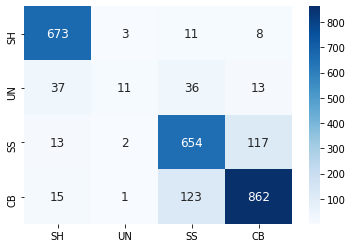

In [ ]:
sns.heatmap(cf_matrix,annot=True,annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)

# Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
Tuned_parameters = [{'kernel':['linear'],'C':[1, 10, 100, 1000]}]

In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
svc_mod=GridSearchCV(SVC(),Tuned_parameters,refit=True,verbose=3) 

In [ ]:
svc_mod.fit(X_train,Y_train) 
svc_mod.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.845, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.831, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.872, total=   0.1s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.847, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.850, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.847, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.833, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.872, total=   0.2s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.847, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.854, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   21.6s finished


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_mod.best_params_) 

{'C': 10, 'kernel': 'linear'}


In [ ]:
print('Accuracy(generalization)',svc_mod.score(X_test,Y_test))
print('Accuracy(memorization)',svc_mod.score(X_train,Y_train))

Accuracy(generalization) 0.8382126348228043
Accuracy(memorization) 0.8499418379216751


In [ ]:
print('F1_score (generalization)',f1_score(Y_test,svc_mod.predict(X_test),average="weighted"))  
print('F1_score (memorization)',f1_score(Y_train,svc_mod.predict(X_train),average="weighted")) 

F1_score (generalization) 0.828853804624704
F1_score (memorization) 0.8427970348806955


# Checking the Model Evaluation

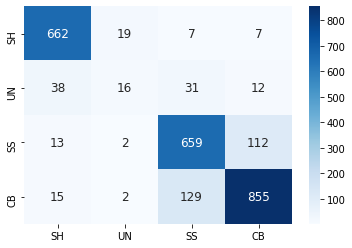

In [ ]:
cf_matrix = confusion_matrix(Y_train, svc_mod.predict(X_train))
sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)
plt.show()